In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten


import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

# Data Preprocessing

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df.index.rename('id', inplace = True)
df.drop_duplicates(inplace = True)

#Encode (cp 0 to 3)(slope 0 to 2)(thal 0 to 3)
df = pd.get_dummies(df, columns=['cp', 'slope', 'thal'], drop_first=True)

df.sample(10)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3
id,,,,,,,,,,,,,,,,,,,
216,62,0,130,263,0,1,97,0,1.2,1,0,0,1,0,1,0,0,0,1
86,68,1,118,277,0,1,151,0,1.0,1,1,0,1,0,0,1,0,0,1
302,57,0,130,236,0,0,174,0,0.0,1,0,1,0,0,1,0,0,1,0
201,60,1,125,258,0,0,141,1,2.8,1,0,0,0,0,1,0,0,0,1
30,41,0,105,198,0,1,168,0,0.0,1,1,1,0,0,0,1,0,1,0
49,53,0,138,234,0,0,160,0,0.0,0,1,0,0,0,0,1,0,1,0
138,57,1,110,201,0,1,126,1,1.5,0,1,0,0,0,1,0,1,0,0
48,53,0,128,216,0,0,115,0,0.0,0,1,0,1,0,0,1,0,0,0
117,56,1,120,193,0,0,162,0,1.9,0,1,0,0,1,1,0,0,0,1


In [3]:
#Amount of Missing Data
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0
ca,ca,0.0


# Split data to Train and Test

In [4]:
#Split Train and Test Data
x = df.drop(columns = "target")
y = df["target"]
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25,random_state= 37)

# Data Scaling

In [5]:
#Standardize Data
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.transform(x_test)

# Build Base Neural Network

In [6]:
# Create Neural Network
model = Sequential()

#Add Two layers(18 input and 2 output) - Sigmoid for last layer because it's binary classification
model.add(Dense(16, input_dim=18, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile with Different Optimizers

In [7]:
#Create Dictionary for Store history of each Optimizer
history = {}

## SGD

In [8]:
#Compile with SGD Optimizer
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
history["SGD"] = model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
8/8 [==============================] - 1s 1ms/step - loss: 0.6326 - accuracy: 0.6276
Epoch 2/25
8/8 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.6626
Epoch 3/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7443
Epoch 4/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7777
Epoch 5/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.7666
Epoch 6/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7875
Epoch 7/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.8058
Epoch 8/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.8201
Epoch 9/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8009
Epoch 10/25
8/8 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.8115
Epoch 11/25
8/8 [======================

## RMSprop


In [9]:
#Compile with RMSprop Optimizer
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history["RMSprop"] = model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
8/8 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8706
Epoch 2/25
8/8 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8375
Epoch 3/25
8/8 [==============================] - 0s 971us/step - loss: 0.3687 - accuracy: 0.8567
Epoch 4/25
8/8 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8821
Epoch 5/25
8/8 [==============================] - 0s 936us/step - loss: 0.3609 - accuracy: 0.8704
Epoch 6/25
8/8 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8712
Epoch 7/25
8/8 [==============================] - 0s 988us/step - loss: 0.3248 - accuracy: 0.8718
Epoch 8/25
8/8 [==============================] - 0s 943us/step - loss: 0.3542 - accuracy: 0.8471
Epoch 9/25
8/8 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8639
Epoch 10/25
8/8 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8523
Epoch 11/25
8/8 [==============

## Compare different Optimizers

### Acuaracy

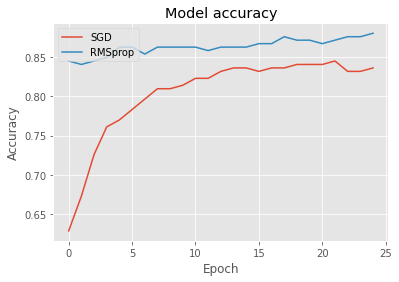

In [10]:
plt.plot(history['SGD'].history['accuracy'])
plt.plot(history['RMSprop'].history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'RMSprop'], loc='upper left')
plt.show()

### Loss

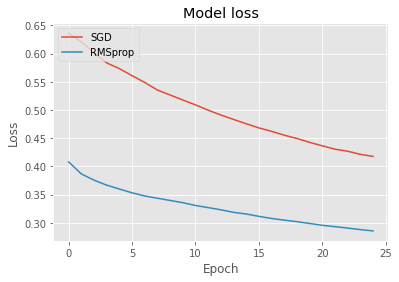

In [11]:
plt.plot(history['SGD'].history['loss']) 
plt.plot(history['RMSprop'].history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['SGD', 'RMSprop'], loc='upper left') 
plt.show()